In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn  as sns
from plotly import express as px
import datetime as dt
import os
sns.set()

In [ ]:
df = pd.read_csv('/content/premier-league.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22975 entries, 0 to 22974
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           22975 non-null  object 
 1   player_name         22975 non-null  object 
 2   age                 22960 non-null  float64
 3   position            22975 non-null  object 
 4   club_involved_name  22975 non-null  object 
 5   fee                 22971 non-null  object 
 6   transfer_movement   22975 non-null  object 
 7   transfer_period     22975 non-null  object 
 8   fee_cleaned         8739 non-null   float64
 9   league_name         22975 non-null  object 
 10  year                22975 non-null  int64  
 11  season              22975 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.1+ MB


In [ ]:
df.isnull().sum()

club_name                 0
player_name               0
age                      15
position                  0
club_involved_name        0
fee                       4
transfer_movement         0
transfer_period           0
fee_cleaned           14236
league_name               0
year                      0
season                    0
dtype: int64

In [ ]:
#removing null value
df = df.rename(columns={'club_name' : 'joined' , 'club_involved_name' : 'left'})
df['club'] = df.joined
df.joined = np.where(df.transfer_movement == 'out', df.left , df.joined)
df.left = np.where(df.transfer_movement == 'out', df.club , df.left)


In [ ]:
df.sample(10)

,joined,player_name,age,position,left,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,club
22818,Udinese Calcio,Pablo Marí,28.0,Centre-Back,Arsenal FC,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022,Arsenal FC
16041,Stoke City,Stephen Ireland,27.0,Attacking Midfield,Aston Villa,Loan fee:€600Th.,out,Summer,0.60,Premier League,2013,2013/2014,Aston Villa
158,Leeds United,Kevin Sharp,18.0,Left-Back,AJ Auxerre U19,€90Th.,in,Summer,0.09,Premier League,1992,1992/1993,Leeds United
555,Arsenal FC,John Bacon,20.0,Centre-Forward,Derry City,"End of loanJun 1, 1993",in,Summer,NaN,Premier League,1993,1993/1994,Arsenal FC
19823,GZ Hengfeng,Mario Suárez,30.0,Centre-Back,Watford FC,?,out,Summer,NaN,Premier League,2017,2017/2018,Watford FC
12978,Arsenal FC,Marouane Chamakh,26.0,Centre-Forward,G. Bordeaux,free transfer,in,Summer,0.00,Premier League,2010,2010/2011,Arsenal FC
3908,Blackburn,Simon Grayson,29.0,Right-Back,Aston Villa,?,out,Summer,NaN,Premier League,1999,1999/2000,Aston Villa
7199,Derby,Rob Edwards,21.0,Centre-Back,Aston Villa,loan transfer,out,Winter,NaN,Premier League,2003,2003/2004,Aston Villa
16250,Chelsea FC,Nemanja Matić,25.0,Defensive Midfield,Benfica,€25.00m,in,Winter,25.00,Premier League,2013,2013/2014,Chelsea FC
15363,Bolton,Rob Hall,19.0,Right Winger,West Ham United,loan transfer,out,Winter,NaN,Premier League,2012,2012/2013,West Ham United


In [ ]:
df[df.joined.str.contains(' U')]['joined'].unique()

array(['Southend United', 'Carlisle United', 'Cambridge Utd.',
       'Manchester United', 'Scunthorpe Utd.', 'Leeds United',
       'Sheffield United', 'Hereford Utd.', 'Man Utd', 'Oxford United',
       'Welling Utd.', 'Newcastle United', 'Colchester Utd.',
       'West Ham United', 'Sheff Utd', 'Dundee United', 'Boston Utd',
       'D.C. United', 'Sydney United', 'Aylesbury Utd.', 'Ayr United',
       'SuperSport Utd.', 'Waterford Utd', 'Central United',
       'Tampere United', 'Spennymoor United', 'Bluebell United',
       'Drogheda United', 'Bolton U23', 'Incheon Utd.', 'Man Utd Res.',
       'Tigres UANL', 'Portsmouth U21', 'Ashton United',
       'Hinckley United', 'Le Mans UC 72', 'WP United', 'Adelaide United',
       'Sampdoria U19', 'Sutton Utd', 'Telford Utd', 'Gold Coast Utd.',
       'Juventus U19', 'Ajax U21', 'Angered United', 'Stoke U21',
       'Airbus UK', 'FC United', 'FC Utrecht', 'Man Utd U21',
       'Chelsea U23', 'Derby U23', 'Man Utd U23'], dtype=object)

In [ ]:
df.joined = df.joined.str.replace(' FC', '', regex=True)
df.left = df.left.str.replace(' FC', '', regex=True)

In [ ]:
df.shape

(22975, 13)

In [ ]:
# shortening teams name
df.joined.replace({'Manchester United' : 'Man Utd' , 'Manchester City' : 'Man City'}, inplace=True)
df.left.replace({'Manchester United' : 'Man Utd' , 'Manchester City' : 'Man City'}, inplace=True)

In [ ]:
df= df[~df.joined.str.contains('U19')]
df= df[~df.joined.str.contains('U21')]
df= df[~df.joined.str.contains('U23')]
df= df[~df.joined.str.contains(' Res')]

In [ ]:
#
df.age = df.age.fillna(df.age.mean())
df.age = df.age.astype(int)

In [ ]:
#We need more investigation about fee_cleaned because maybe player had transferred free or exchange deal.
fee = df[df.fee_cleaned.isnull()]
fee.fee.unique()

array(['?', '-', 'loan transfer', ..., 'End of loanApr 26, 2022',
       'End of loanFeb 2, 2022', 'End of loanJan 19, 2022'], dtype=object)

In [ ]:
#The player with NaN fee either (loan transfer, End of Loan, or Unknown(- , ?)), we will check the unknown status to check what happened with these players
fee = fee[fee.fee.isin(['-','?'])]
fee.sample(10)

,joined,player_name,age,position,left,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,club
10498,Southampton,Stern John,30,Centre-Forward,Sunderland AFC,?,out,Summer,NaN,Premier League,2007,2007/2008,Sunderland AFC
9579,Retired,Les Ferdinand,39,Centre-Forward,Watford,-,out,Summer,NaN,Premier League,2006,2006/2007,Watford FC
4520,Chelsea,Warren Cummings,19,Left-Back,Chelsea U18,-,in,Summer,NaN,Premier League,2000,2000/2001,Chelsea FC
162,Leeds United,Mark Tinkler,17,Central Midfield,Leeds U18,-,in,Summer,NaN,Premier League,1992,1992/1993,Leeds United
20036,Without Club,Doneil Henry,24,Centre-Back,West Ham United,-,out,Winter,NaN,Premier League,2017,2017/2018,West Ham United
3829,Newcastle United,Stuart Green,18,Right Winger,Newcastle U18,-,in,Summer,NaN,Premier League,1999,1999/2000,Newcastle United
1068,West Ham United,Mark Watson,21,attack,Sutton Utd,?,in,Summer,NaN,Premier League,1994,1994/1995,West Ham United
3414,Nottingham Forest,Bernard Allou,23,Right Winger,Nagoya Grampus,?,in,Winter,NaN,Premier League,1998,1998/1999,Nottingham Forest
407,Aston Villa,Paul Browne,18,Centre-Back,Aston Villa U18,-,in,Summer,NaN,Premier League,1993,1993/1994,Aston Villa
918,Wimbledon,Lutz Pfannenstiel,21,Goalkeeper,Penang,?,in,Summer,NaN,Premier League,1994,1994/1995,Wimbledon FC


In [ ]:
#after checking some players status in , we found that they are transferred for free, so we will fill Nan values of fee_cleaned with 0.0
df.fee_cleaned = df.fee_cleaned.fillna(0)

In [ ]:
df = df[['year' , 'player_name', 'position', 'age', 'left', 'joined', 'fee', 'fee_cleaned', 'transfer_period']] # removing unnecessar columns

In [ ]:
df = df.drop_duplicates() # drop duplicated columns
df.shape

(22446, 9)

In [ ]:
# Create Function for measure the distribution of the columns that you need
def get_count(col, title, top):
    if top == 0:
        d = pd.DataFrame(df[col].value_counts())
    else:
         d = pd.DataFrame(df[col].value_counts().head(top))
    d = d.reset_index()
    d = d.rename(columns={'index' : col , col : 'count'})
    d.sort_values('count', ascending=False)
    return px.bar(data_frame=d, x= col, y='count' , title= title, text_auto=True)

In [ ]:
get_count('joined', 'Top 20 Clubs transfering',20)

In [ ]:
get_count('player_name' , 'Top 20 Players Transferred' , 20)

In [ ]:
px.box(data_frame=df, x='age', title="Players' Ages")

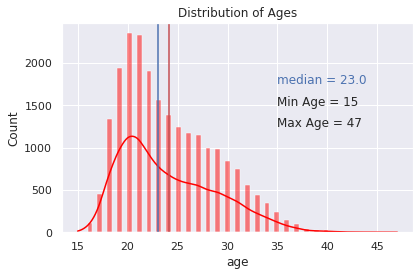

In [ ]:
sns.histplot(data=df, x='age', kde=True, color='red')
plt.axvline(df.age.mean() , c='r')
plt.axvline(df.age.median() , c='b')
plt.text(35,1750, 'median = {}'.format(df.age.median()), c='b')
plt.text(35,1500, 'Min Age = {}'.format(df.age.min()))
plt.text(35,1250, 'Max Age = {}'.format(df.age.max()))
plt.title('Distribution of Ages')
plt.tight_layout();

In [ ]:
d = df[df.fee_cleaned != 0]
px.box(d,x='fee_cleaned' , title= 'Amounts of Transferring')

In [ ]:
get_count('year' , 'No. of Transfers each year', 0)

variate analysis

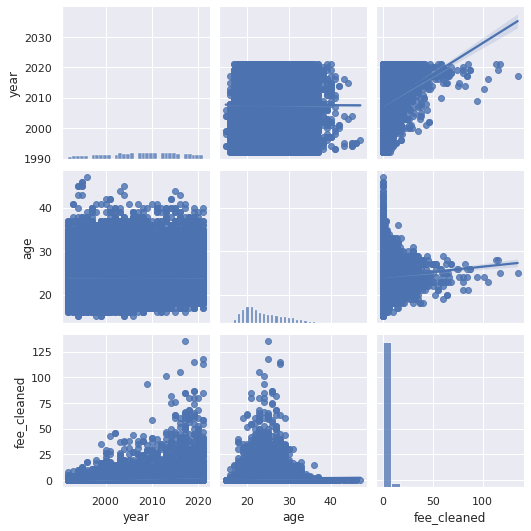

In [ ]:
sns.pairplot(df , kind='reg');

correlation between x-variables(year and age) and fee cleaned

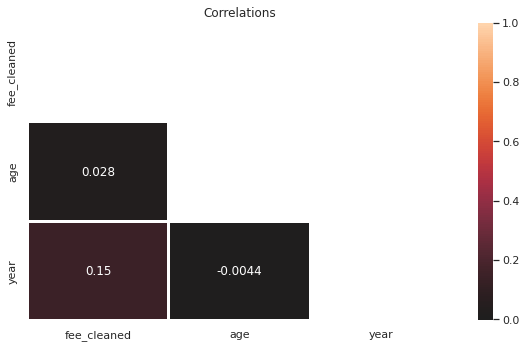

In [ ]:
sns.set(style="white")
plt.figure(figsize=(8,5))
corr = df[['fee_cleaned','age' , 'year']].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=1, center=0,annot = True, linewidth=2)
plt.title('Correlations')
plt.tight_layout();